# Neural Networks using MLP

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into train + validation + test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Create MLP regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                       activation='relu',
                       solver='adam',
                       max_iter=500,
                       random_state=42)

# Create pipeline with scaling
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred = pipeline.predict(X_valid)

# Compute RMSE manually
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.4f}")


Validation RMSE: 0.5501


# Using Keras to build an image classifier

## Load Data and split into training, test, and validation sets

In [5]:
###################################################
###################################################
# Image Classifier using keras
#   -- Made up of 70,000 images
#   -- This data set is already shuffled and been split up into:
#         -- Test set: 10,000 images
#         -- Training set: 60,000 images
#
#   -- Hold out the last 5,000 images from the training set
#         -- For the validation set (within the training set)
###################################################

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
########################################################################
# Training set contains 60,000 grayscale images, each 28x28 pixels
########################################################################

X_train.shape

(55000, 28, 28)

In [7]:
#################################################################
# uint8 - unsigned integer 8-bit data type
#   -- It store positive whole values from 0 to 255
X_train.dtype

dtype('uint8')

In [8]:
##################################################################################
# We want to scale down the intensities to the 0-1 and convert to floats
# by dividing by 255
##################################################################################

X_train, X_valid, X_test = X_train /255., X_valid/255., X_test / 255.

In [9]:
X_train.dtype

dtype('float64')

In [10]:
#####################################################
# set up graphics
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

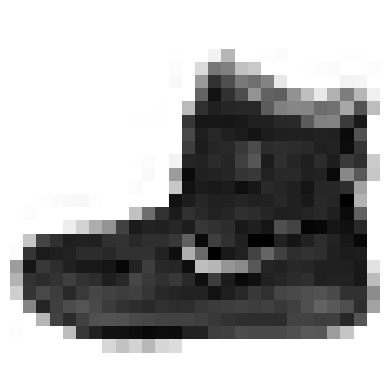

In [11]:
################################################################################
# Plot n image using imshow() function with 'binary' color

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
##############################################################
# The labels are class IDs (represented as uint8) from 0 to 9

y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [13]:
############################################################################
# Corresponding class names...

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
############################################################################
# First image in training set: an ankle boot

class_names[y_train[0]]

'Ankle boot'

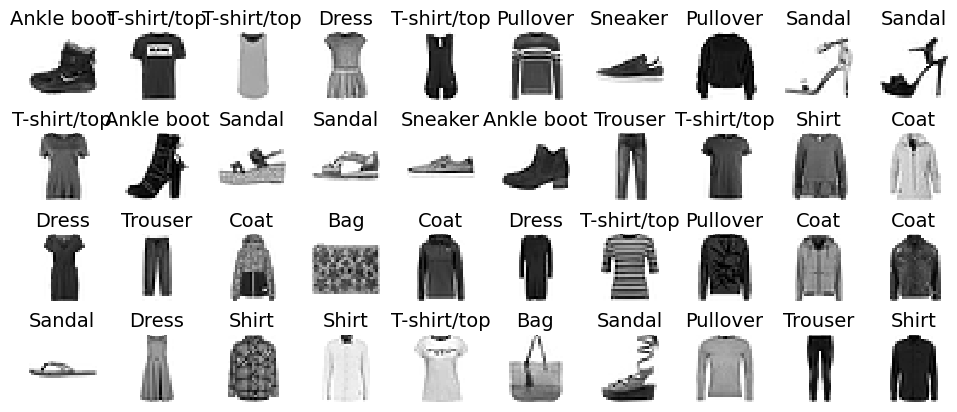

In [14]:
############################################################################
# Look at simple of the imaged in the dataset
############################################################################

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Building Neural Network

In [15]:
#############################################################
# Building the neural network
#############################################################

# Want random weight of hidden to be consistent every time we run
tf.random.set_seed(42)

# Single stack of layers connected sequentially: Sequential API
model = tf.keras. Sequential()

# Build first layer: the input layer
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))

# Build Flatten Layer
# Its role is to convert each image into the ID array
model.add(tf.keras.layers.Flatten())

# Build first dense hidden layer with 300 neurons
# Use the RELU activation function
model.add(tf.keras.layers.Dense(300, activation="relu"))

# Build second dense hidden layer with 100 neurons
model.add(tf.keras.layers.Dense(100, activation="relu"))

# Build dense output layer with 10 neurons (one per class)
# Softmax activation function
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
###########################################################
# Extra code:
# Clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

In [ ]:
################################################################
# Parameters: (28 * 28) * 300 neurons + 300 biases = 235500

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


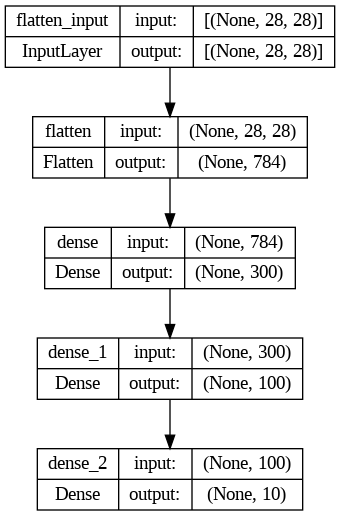

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
###########################################################3
# Connection weights

weights, biases = hidden1.get_weights()
weights

array([[-0.03514293, -0.00176527,  0.06199624, ...,  0.05735376,
         0.00423308,  0.0601933 ],
       [-0.04819331,  0.00983904, -0.01650062, ...,  0.00988169,
        -0.00543096, -0.02769775],
       [-0.00514671, -0.0530875 ,  0.05202502, ...,  0.02532758,
        -0.06183215, -0.01803759],
       ...,
       [ 0.00460173,  0.04219424, -0.07223526, ...,  0.06205478,
        -0.07350224,  0.03749318],
       [ 0.00423381,  0.01586028,  0.01666682, ...,  0.05867869,
        -0.04552294, -0.05611496],
       [ 0.0663237 ,  0.012223  ,  0.01679819, ..., -0.03045948,
        -0.01803477, -0.03812872]], dtype=float32)

In [ ]:
################################################
# 28 * 28 by 300 neurons

weights.shape

(784, 300)

In [ ]:
#####################################################
# biases
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compile Model

In [ ]:
######################################################################################3
# Compiling a Model
#
# Specify the loss function and the optimizer to use
#     -- Sparse labels (for each instance, there is just a taret class index 0 to 9)
#     -- SGD: Stochastic gradient descent
#           -- Backpropogation

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



## Training Model

In [ ]:
#################################################
# Training Model

history = model.fit(X_train, y_train, epochs = 30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7034 - accuracy: 0.7679 - val_loss: 0.4986 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4831 - accuracy: 0.8328 - val_loss: 0.4687 - val_accuracy: 0.8324
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4392 - accuracy: 0.8463 - val_loss: 0.4269 - val_accuracy: 0.8460
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4150 - accuracy: 0.8560 - val_loss: 0.3939 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3941 - accuracy: 0.8617 - val_loss: 0.3912 - val_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3780 - accuracy: 0.8664 - val_loss: 0.3964 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3656 - accuracy: 0.8697 - val_loss: 0.3713 - val_accurac

In [ ]:
################################################################
# Visualizing accuracy as it is trained
###############################################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim[0,29], ylim[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

plt.legend(loc="lower left")
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-6-c44b4cd3deaf>, line 10)

## SUMMARY CODE

In [ ]:
###################################################
###################################################
# Image Classifier using keras
#   -- Made up of 70,000 images
#   -- This data set is already shuffled and been split up into:
#         -- Test set: 10,000 images
#         -- Training set: 60,000 images
#
#   -- Hold out the last 5,000 images from the training set
#         -- For the validation set (within the training set)
###################################################

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

##################################################################################
# We want to scale down the intensities to the 0-1 and convert to floats
# by dividing by 255
##################################################################################

X_train, X_valid, X_test = X_train /255., X_valid/255., X_test / 255.

############################################################################
# Corresponding class names...

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
###########################################################
# Extra code:
# Clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

######################################################################################3
# Compiling a Model
#
# Specify the loss function and the optimizer to use
#     -- Sparse labels (for each instance, there is just a taret class index 0 to 9)
#     -- SGD: Stochastic gradient descent
#           -- Backpropogation

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



In [ ]:
#################################################
# Training Model

history = model.fit(X_train, y_train, epochs = 30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7068 - accuracy: 0.7689 - val_loss: 0.5017 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4869 - accuracy: 0.8313 - val_loss: 0.4597 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4399 - accuracy: 0.8449 - val_loss: 0.4230 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4150 - accuracy: 0.8559 - val_loss: 0.3961 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3942 - accuracy: 0.8622 - val_loss: 0.3954 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3781 - accuracy: 0.8679 - val_loss: 0.4050 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3658 - accuracy: 0.8705 - val_loss: 0.3711 - val_accuracy:

## Make predictions

In [ ]:
####################################################################
# Make predictions
#   -- Using first 3 rows of the test data as the new X data
#   -- Show the probabilites

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 106ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
############################################################################
# Corresponding class names...

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
#################################################################
# Show the highest probable target using argmax()

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
#######################################################
# Show corresponding class names for target predictions

import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

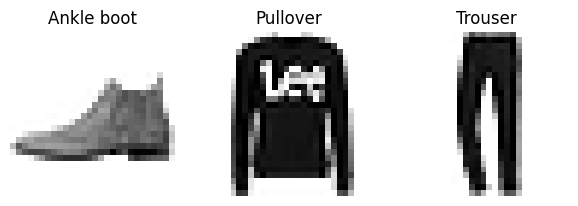

In [ ]:
###################################################
# Visualize the images

import matplotlib.pyplot as plt
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis('off')
  plt.title(class_names[y_test[index]])

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()